In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import make_blobs


In [2]:

class Perceptron(object):

    def __init__(self, no_of_inputs, passNum=100, learning_rate=0.01):
        self.passNum = passNum
        self.learning_rate = learning_rate
        self.weights = np.zeros(no_of_inputs + 1)

    def train(self, training_inputs, labels):
        for _ in range(self.passNum):
            #zip function transposes the rows to columns, to make new rows
            #ex: A= [a,b,c], B=[2,4,1], zip (A, B) = [(a, 2), (b, 4), (c,1)]
            
            
            
            
            for inputs, label in zip(training_inputs, labels): 
                prediction = self.predict(inputs)
                self.weights[1:] += self.learning_rate * (label - prediction) * inputs
                self.weights[0] += self.learning_rate * (label - prediction)

    def predict(self, inputs):
        summation = np.dot(inputs, self.weights[1:]) + self.weights[0]
        if summation > 0:
          activation = 1
        else:
          activation = 0            
        return activation



In [3]:
n_samples = 50  # 50 Training points for both cases.
colours = ('green', 'red')  # colors for case 1 and 2

In [4]:
test_samples = 50


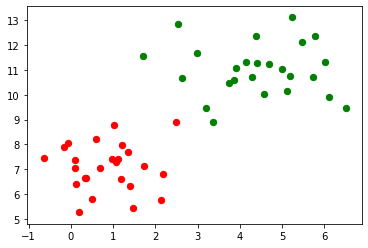

In [5]:
## CASE 1 TRAINING POINTS ARE LINEARLY SEPARABLE.
c1_w_dummy = np.zeros((50,3)) #Needed to format after getting the inputs

c1_samples, labels = make_blobs(n_samples = n_samples, 
                             centers = ([ 4.25, 10.9 ], [1, 7]), 
                             random_state = 0)

fig, ax = plt.subplots()

for i in range(2):
    ax.scatter(c1_samples[labels == i][:, 0], c1_samples[labels == i][:, 1], 
               c = colours[i], s = 40, label = str(i))
    
i = 0
for point in c1_samples:
    c1_w_dummy[i] = np.insert(point, 0, 1, axis=0)
    i += 1

In [10]:
c1_samples

array([[ 1.20827498,  7.97663904],
       [ 5.78277921, 12.36935877],
       [ 1.01050002,  8.78587049],
       [ 0.32753955,  6.64044684],
       [ 0.48919486,  5.81936782],
       [ 4.14678115, 11.3105985 ],
       [ 1.72909056,  7.12898291],
       [ 3.36221425,  8.91920353],
       [ 2.17877957,  6.82007516],
       [ 4.5630677 , 10.04590426],
       [ 0.10453344,  7.3869025 ],
       [ 3.90208785, 11.05634897],
       [ 6.11755799,  9.92272212],
       [ 3.86267318, 10.59769725],
       [ 0.97181777,  7.42833187],
       [-0.07075262,  8.05445173],
       [ 2.99720464, 11.67749036],
       [ 3.20144703,  9.47998206],
       [ 1.06651722,  7.3024719 ],
       [ 5.74407907, 10.69484174],
       [-0.63019835,  7.46278226],
       [ 6.01405235, 11.30015721],
       [ 0.12920285,  6.42115034],
       [ 4.39404357, 12.35427351],
       [ 3.74034782, 10.4619257 ],
       [ 1.40234164,  6.31518991],
       [ 1.3563664 ,  7.70657317],
       [ 6.51975462,  9.44563433],
       [ 1.69701018,

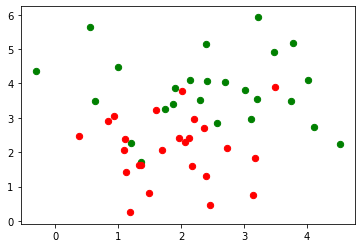

In [7]:
## CASE 2 TRAINING POINTS ARE (NOT) LINEARLY SEPARABLE.

c2_w_dummy = np.zeros((50,3)) #Needed to format after getting the inputs


c2_samples, c2_labels = make_blobs(n_samples = n_samples, 
                             centers = ([2.25, 3.7], [2, 2]),  # We just need to move these points closer together.
                             random_state = 0)

fig, ax = plt.subplots()

for i in range(2):
    ax.scatter(c2_samples[c2_labels == i][:, 0], c2_samples[c2_labels == i][:, 1], 
               c = colours[i], s = 40, label = str(i))
i = 0
for point in c1_samples:
    c2_w_dummy[i] = np.insert(point, 0, 1, axis=0)
    i += 1
    
    # plt.show()

In [8]:
#%run perceptron.ipynb     #Running the perceptron notebook.
perceptron = Perceptron(2) #Creating an instance of the perceptron.

In [11]:
perceptron.train(c1_samples, labels)

In [23]:
inputs3 = np.array([1, 7])

In [24]:
perceptron.predict(inputs3)

1

None is the lkasdjflksdakljf


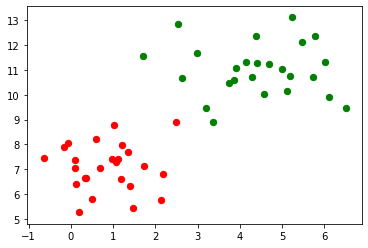

In [26]:
fig, ax = plt.subplots()

for i in range(2):
    ax.scatter(c1_samples[labels == i][:, 0], c1_samples[labels == i][:, 1], 
               c = colours[i], s = 40, label = str(i))
    
weight_vector = perceptron.train(c1_samples, labels)
predict_vector=perceptron.predict(inputs3)
print(np.sum(weight_vector), "is the lkasdjflksdakljf")
predict_vector
#f = lambda x: np.sum(weight_vector)*x # I"m 99% sure that this is the incorrect way to find the line, if you (Yang) know how to do this please fix it.

#ax.plot(f(weight_vector),lw=2.5, c="k",label="line found by perceptron?") #I can't for the life of me figure out how to graph this line, do you have any ideas?

i = 0
for point in c1_samples:
    c1_w_dummy[i] = np.insert(point, 0, 1, axis=0)
    i += 1


In [27]:
print(predict_vector)

1


# Linearly seperable testing data



IndexError: index 30 is out of bounds for axis 0 with size 30

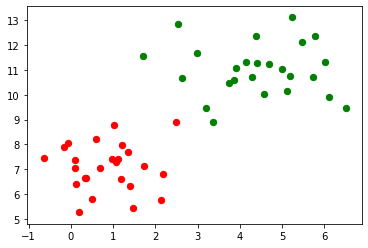

In [28]:

c3_w_dummy = np.zeros((30,3)) #Needed to format after getting the inputs

c3_samples, labels = make_blobs(n_samples = test_samples, 
                             centers = ([ 4.25, 10.9 ], [1, 7]), 
                             random_state = 0)

fig, ax = plt.subplots()

for i in range(2):
    ax.scatter(c3_samples[labels == i][:, 0], c3_samples[labels == i][:, 1], 
               c = colours[i], s = 40, label = str(i))
    
i = 0
for point in c3_samples:
    c3_w_dummy[i] = np.insert(point, 0, 1, axis=0)
    i += 1